<a href="https://colab.research.google.com/github/magedyasse/Linear_Reg/blob/main/Predication_the_charges_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predication the charges

----
# Using Linear_Regression



 ### 1 - Import  

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2 - Read Data

In [102]:
df = pd.read_csv('/content/insurance.csv')
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
830,63,male,33.100,0,no,southwest,13393.75600
973,19,female,40.500,0,no,southwest,1759.33800
962,63,female,35.200,1,no,southeast,14474.67500
955,31,male,39.490,1,no,southeast,3875.73410
134,20,female,28.785,0,no,northeast,2457.21115


## 3 - explor

In [103]:
df.info()

# From My Info i don't have any Null value
# age , children ==> int
# Body Mass Index (bmi) , charges ==> float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [105]:
df.min()

,0
age,18
sex,female
bmi,15.96
children,0
smoker,no
region,northeast
charges,1121.8739


In [106]:
df.max()

,0
age,64
sex,male
bmi,53.13
children,5
smoker,yes
region,southwest
charges,63770.42801


From Max and Min Good for  Scaler

In [107]:
df.shape

(1338, 7)

In [208]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [109]:
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 1


Drop Duplication
I'will Remove Duplication From df and Save in  df_cleaned

In [229]:
df.drop_duplicates(inplace=True)
print("Number of duplicated rows:", df.duplicated().sum())
print("_"*30)
df.head(5)

Number of duplicated rows: 0
______________________________


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [108]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Note : 'sex' , smoker' and	'region' is Categorical Data there Should be Encoded

# Need To Handle Categorical Data



1.   Label Encoding
2.   One-Hot Encoding
3.   Ordinal Encoding
4.   Binary Encoding
5.   Target Encoding (Mean Encoding)



In [228]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_features = ['sex', 'smoker', 'region']

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')


In [231]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


5 - Data Viz

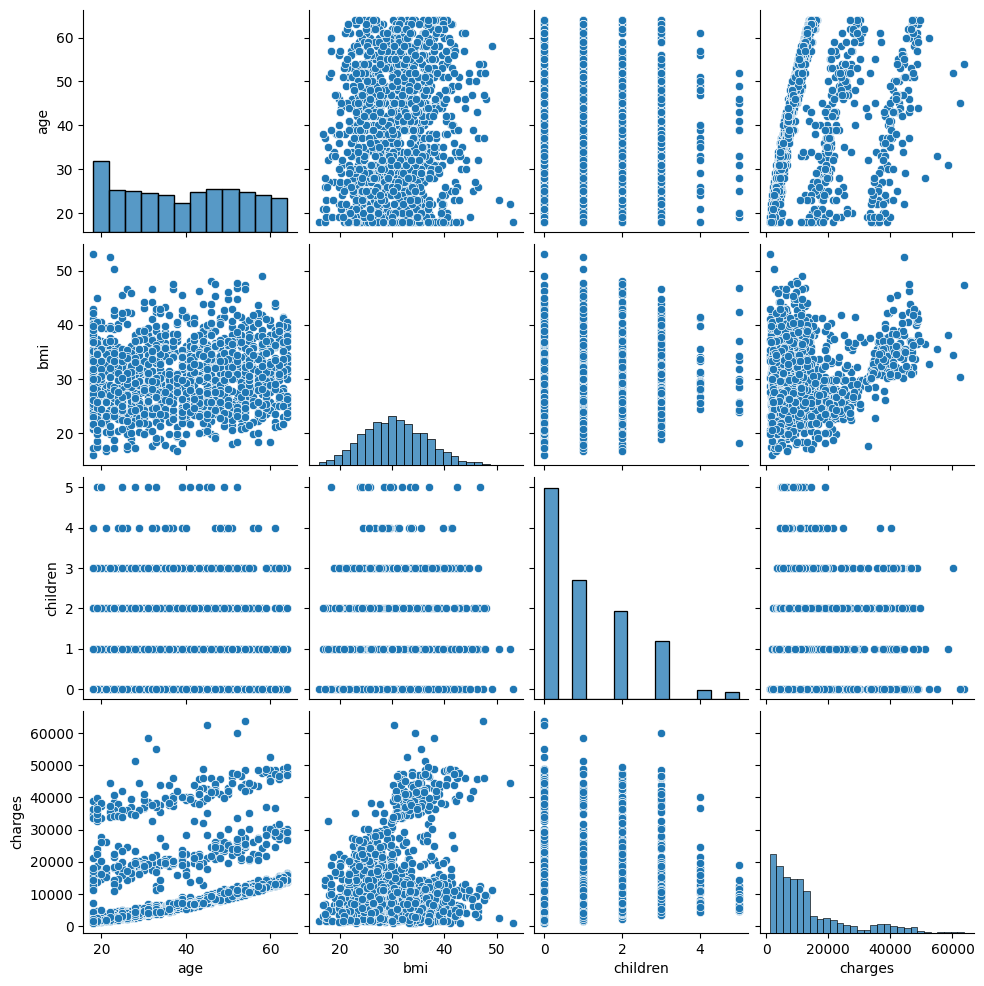

In [163]:
sns.pairplot(df,x_vars=['age', 'bmi', 'children', 'charges'],y_vars=['age', 'bmi', 'children', 'charges'])

6 - Split

In [230]:
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1069, 6) (268, 6) (1069,) (268,)


7 - Model

In [235]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

8 - predication

In [236]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R^2 Score: 0.8069287081198016
MSE: 35478020.67523553


9 -Test

In [238]:
new_data = pd.DataFrame([{
    'age': 35,
    'sex': 'male',
    'bmi': 28.0,
    'children': 2,
    'smoker': 'no',
    'region': 'southwest'
}])

predicted_charge = model.predict(new_data)
print("Predicted medical charges:", predicted_charge[0])


Predicted medical charges: 6823.701430638648


In [240]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']